In [18]:
# Profit Maximisation
# Overbookig - Simple Strategy Example based on "No Show" count
# Room Count for overbooking is sligthly higher than "No Show" count


In [1]:
# Install the libraries
import seaborn as sns
import matplotlib as mlt
import random as rd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [23]:
hotel_capacity = 100; # 100 Hotel Rooms

prob_showup = 0.97; # Given procentuel share:
# 3% "No Show" and 97% "Show" for particular period

In [27]:
revenue_per_room = 50; # 50 EUR per 1 Room
room_price = revenue_per_room * 2; # 100 EUR
simulation_anzahl = 10000; # epoch count
max_overbooking = 18; # save the maximum room count possible to overbook
revenue = np.zeros(shape = (simulation_anzahl,max_overbooking+1));

In [24]:
def show_up(prob_showup):
  if rd.random() <= 0.97 :
    return True; # person showed up
  else:
    return False; # person didnt show up

In [25]:
# Simulating the night, to fig out total customers who showed up for a night

def simulate_night(rooms_sold,prob_showup):
  n=0;
  for i in range(1,rooms_sold):
      if(show_up(prob_showup)):
        n = n+1;

  return n

In [26]:
# simulating the net Revenue per night

def simulate_net_revenue( rooms_sold, hotel_capacity, prob_showup, revenue_per_room, room_price):
  total_showups = simulate_night(rooms_sold, prob_showup);
  if (total_showups <= hotel_capacity):
    return revenue_per_room * total_showups;
  else:
     rooms_overbooked = total_showups - hotel_capacity; # number of overbooked rooms
     return (total_showups * revenue_per_room) - (room_price * rooms_overbooked);

In [28]:
for rooms_overbooked in range(0,max_overbooking):
  rooms_sold = hotel_capacity + rooms_overbooked;
  for i in range(1,simulation_anzahl):revenue[i,rooms_overbooked] = simulate_net_revenue(rooms_sold, hotel_capacity,prob_showup, revenue_per_room, room_price);

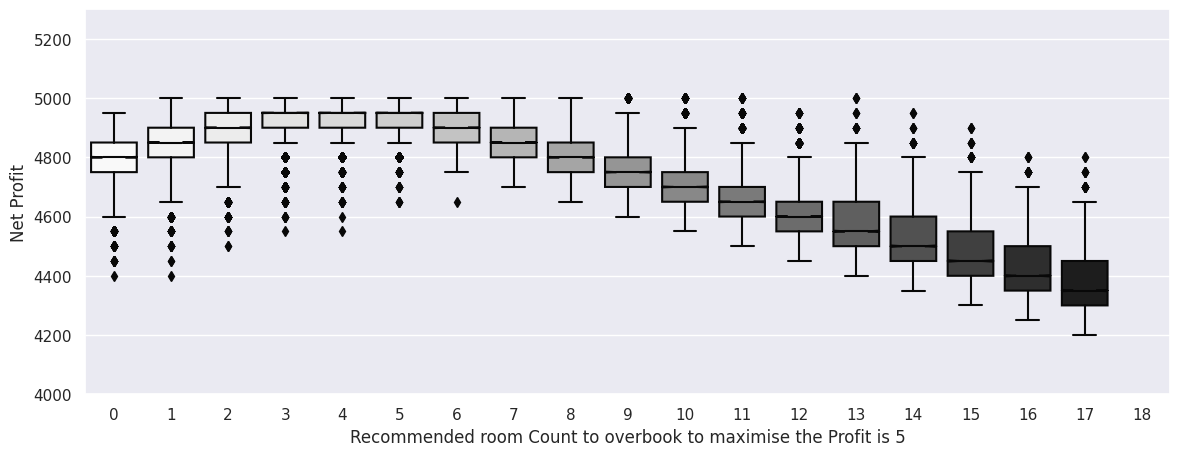

In [32]:
# In the case we overbook up to 5 rooms, our Revenue is growing

# Graph
sns.set();
sns.set(rc={'figure.figsize':(14,5)})
ax = sns.boxplot(data = revenue, notch=True, palette="Greys");
plt.xlabel("Recommended room Count to overbook to maximise the Profit is 5");
plt.ylabel("Net Profit")
plt.ylim(4000,5300);
# plt.yticks([3000,4000,4500]);

In [ ]:
https://en.wikipedia.org/wiki/New_old_stock
https://ecommons.cornell.edu/server/api/core/bitstreams/bb8eb217-0704-4e6b-aff2-7d8e67d0a852/content
https://bmchealthservres.biomedcentral.com/articles/10.1186/s12913-023-10418-6
https://www.researchgate.net/publication/340134880_A_Machine_Learning_Overbooking_Algorithm_for_Enhancing_Clinic_Efficiency_A_MACHINE_LEARNING_OVERBOOKING_ALGORITHM_FOR_ENHANCING_CLINIC_EFFICIENCY
https://medium.com/@gaurang.swarge/airline-ticket-overbooking-monte-carlo-simulation-9e276cc2bd8a
